# Data Preparation Notebook

## Purpose
This notebook is dedicated to preparing all datasets for subsequent analysis. The focus is on cleaning, structuring, and standardizing data to ensure consistency across analyses.

## Datasets Overview
This section lists all the datasets involved, such as:
- Russian Losses as Documented by 3rd Party
- Ukrainian Losses as Reported by Ukrainian State
- [Add others as applicable]

## Tools and Libraries
This notebook utilizes Python libraries including pandas for data manipulation and NumPy for numerical operations.

# Setup

## Import Libraries
Here, we import all necessary Python libraries needed for data preparation tasks.



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
# TODO: Import any additional libraries needed


# Data Loading

## Load Data
Each dataset is loaded from its respective source. Detailed instructions and code for loading each specific dataset are provided below.


In [2]:
import pandas as pd

# Load the first dataset (Documented Losses for both Ukraine and Russia)
file_path_documented = '/Users/jaytonschmeeckle/Local/Repos/Math-CSCE-440-Final-Project/MATH440-Project/Data/Russia-Ukraine Equipment Losses - Original.csv'
df_documented = pd.read_csv(file_path_documented)
documented_headers = df_documented.columns.tolist()

# Load the second dataset (Russian Losses as Claimed by Ukraine)
file_path_claimed = '/Users/jaytonschmeeckle/Local/Repos/Math-CSCE-440-Final-Project/MATH440-Project/Data/Russian_Losses-ClaimedbyUkraine.csv'
df_claimed = pd.read_csv(file_path_claimed)
claimed_headers = df_claimed.columns.tolist()

# Display headers from both datasets with explicit descriptions
print("Headers from Documented Losses (both Ukraine and Russia):")
print(documented_headers)
print("\nHeaders from Russian Losses as Claimed by Ukraine:")
print(claimed_headers)


Headers from Documented Losses (both Ukraine and Russia):
['Date', 'Russia_Total', 'Change', 'Ukraine_Total', 'Change.1', 'Ratio RU/UA', 'Russia_Destroyed', 'Ukraine_Destroyed', 'Unnamed: 8', 'Russia_Damaged', 'Ukraine_Damaged', 'Ukraine_Abandoned', 'Unnamed: 12', 'Russia_Abandoned', 'Unnamed: 14', 'Russia_Captured', 'Ukraine_Captured', 'Unnamed: 17', 'Russia_Tanks', 'Ukraine_Tanks', 'Russia_Tank_Capture', 'Ukraine_Tank_Capture', 'Unnamed: 22', 'Russia_AFV', 'Ukraine_AFV', 'Russia_AFV_Capture', 'Ukraine_AFV_Capture', 'Unnamed: 27', 'Russia_IFV', 'Ukraine_IFV', 'Unnamed: 30', 'Russia_APC', 'Ukraine_APC', 'Unnamed: 33', 'Russia_IMV', 'Ukraine_IMV', 'Unnamed: 36', 'Russia_Engineering', 'Ukraine_Engineering', 'Unnamed: 39', 'Russia_Coms', 'Ukraine_Coms', 'Unnamed: 42', 'Russia_Vehicles', 'Ukraine_Vehicles', 'Unnamed: 45', 'Russia_Aircraft', 'Ukraine_Aircraft', 'Unnamed: 48', 'Russia_Infantry', 'Ukraine_Infantry', 'Unnamed: 51', 'Russia_Logistics', 'Ukraine_Logistics', 'Unnamed: 54', 'Russi

# Data Structuring

## Reshape Data
Data is organized into a consistent format across all datasets for easier analysis.

## Merge/Concatenate
Data from different sources is combined if necessary to create a unified dataset for analysis.


In [3]:
# Initialize a new DataFrame for standardized data
df_standardized = pd.DataFrame()

# Date Column
df_standardized['Date'] = df_documented['Date']

# Tanks
df_standardized['RUS-Tanks-Documented'] = df_documented['Russia_Tanks']
df_standardized['RUS-Tanks-Claimed-UKR'] = df_claimed['tanks']

# Aircraft
df_standardized['RUS-Aircraft-Documented'] = df_documented['Russia_Aircraft']
df_standardized['RUS-Aircraft-Claimed-UKR'] = df_claimed['planes'] + df_claimed['helicopters'] + df_claimed['uav']

# Artillery
df_standardized['RUS-Artillery-Documented'] = df_documented['Russia_Artillery']
df_standardized['RUS-Artillery-Claimed-UKR'] = df_claimed['artillery_systems'] + df_claimed['mlrs']

# Air Defense
df_standardized['RUS-AirDefense-Documented'] = df_documented['Russia_Antiair']
df_standardized['RUS-AirDefense-Claimed-UKR'] = df_claimed['air_defense_equipment']

# Vehicles
df_standardized['RUS-Vehicles-Documented'] = df_documented['Russia_Vehicles']
df_standardized['RUS-Vehicles-Claimed-UKR'] = df_claimed['cars_and_tank_trucks']

# Personnel
df_standardized['RUS-Personnel-Documented'] = df_documented['Russia_Infantry']
df_standardized['RUS-Personnel-Claimed-UKR'] = df_claimed['personnel']


# Output

## Save Clean Data
The cleaned and structured data is saved to new files or databases for easy access in subsequent analysis phases.


In [4]:
# Save the standardized data to a new CSV file
df_standardized.to_csv('standardized_data.csv', index=False)

# Or analyze directly within the notebook
print(df_standardized.head())


         Date  RUS-Tanks-Documented  RUS-Tanks-Claimed-UKR  \
0  2022-02-24                     1                    0.0   
1  2022-02-25                     2                    0.0   
2  2022-02-26                     7                    0.0   
3  2022-02-27                     9                  150.0   
4  2022-02-28                    41                  191.0   

   RUS-Aircraft-Documented  RUS-Aircraft-Claimed-UKR  \
0                        4                      13.0   
1                        5                      17.0   
2                        5                      34.0   
3                        6                      55.0   
4                        7                      61.0   

   RUS-Artillery-Documented  RUS-Artillery-Claimed-UKR  \
0                         0                        0.0   
1                         4                        0.0   
2                         4                        0.0   
3                         4                       54.0   


## Data Cleaning Function

This function is designed to streamline the process of checking and cleaning data for any selected category of losses (e.g., tanks, aircraft). It handles missing values, corrects data types, and ensures that the dataset is ready for further analysis. By parameterizing the function, we can apply the same cleaning logic to different data categories efficiently.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.optimize import newton
from scipy.interpolate import CubicSpline
import seaborn as sns

def clean_data(category):
    """Cleans data for the specified category of losses.
    
    Args:
        category (str): The category to clean, e.g., 'Tanks', 'Aircraft'.
    """
    documented_col = f'RUS-{category}-Documented'
    claimed_col = f'RUS-{category}-Claimed-UKR'

    # Check for missing values
    print(f"Missing values before cleaning for {category}:")
    print(df_standardized[[documented_col, claimed_col]].isnull().sum())

    # Handle missing values by forward filling
    df_standardized[documented_col].fillna(method='ffill', inplace=True)
    df_standardized[claimed_col].fillna(method='ffill', inplace=True)

    # Convert data types to integer
    df_standardized[documented_col] = df_standardized[documented_col].astype(int)
    df_standardized[claimed_col] = df_standardized[claimed_col].astype(int)

    # Verify changes
    print(f"Data types after conversion for {category}:")
    print(df_standardized[[documented_col, claimed_col]].dtypes)
    print("\nSample data after cleaning:")
    print(df_standardized[[documented_col, claimed_col]].head())

clean_data('Tanks')  # Modify 'Tanks' to any other category needed


Missing values before cleaning for Tanks:
RUS-Tanks-Documented      0
RUS-Tanks-Claimed-UKR    15
dtype: int64
Data types after conversion for Tanks:
RUS-Tanks-Documented     int64
RUS-Tanks-Claimed-UKR    int64
dtype: object

Sample data after cleaning:
   RUS-Tanks-Documented  RUS-Tanks-Claimed-UKR
0                     1                      0
1                     2                      0
2                     7                      0
3                     9                    150
4                    41                    191


## Verifying Changes Across Categories

After applying the cleaning function to different categories, this section is intended for final verification. You can run diagnostics, visualize data, or apply further checks to ensure that all categories have been cleaned and are ready for in-depth analysis.


In [6]:
# Example of how to check data across multiple categories
categories = ['Tanks', 'Aircraft', 'Artillery', 'AirDefense', 'Vehicles', 'Personnel']
for category in categories:
    documented_col = f'RUS-{category}-Documented'
    claimed_col = f'RUS-{category}-Claimed-UKR'
    print(f"{category} - Missing values check:")
    print(df_standardized[[documented_col, claimed_col]].isnull().sum())
    print(f"{category} - Data type check:")
    print(df_standardized[[documented_col, claimed_col]].dtypes)
    print()


Tanks - Missing values check:
RUS-Tanks-Documented     0
RUS-Tanks-Claimed-UKR    0
dtype: int64
Tanks - Data type check:
RUS-Tanks-Documented     int64
RUS-Tanks-Claimed-UKR    int64
dtype: object

Aircraft - Missing values check:
RUS-Aircraft-Documented      0
RUS-Aircraft-Claimed-UKR    15
dtype: int64
Aircraft - Data type check:
RUS-Aircraft-Documented       int64
RUS-Aircraft-Claimed-UKR    float64
dtype: object

Artillery - Missing values check:
RUS-Artillery-Documented      0
RUS-Artillery-Claimed-UKR    15
dtype: int64
Artillery - Data type check:
RUS-Artillery-Documented       int64
RUS-Artillery-Claimed-UKR    float64
dtype: object

AirDefense - Missing values check:
RUS-AirDefense-Documented      0
RUS-AirDefense-Claimed-UKR    15
dtype: int64
AirDefense - Data type check:
RUS-AirDefense-Documented       int64
RUS-AirDefense-Claimed-UKR    float64
dtype: object

Vehicles - Missing values check:
RUS-Vehicles-Documented      0
RUS-Vehicles-Claimed-UKR    15
dtype: int64
Vehicl

## Error Analysis

Calculate the Mean Absolute Error (MAE) and Mean Squared Error (MSE) between the documented and claimed data to quantify discrepancies.


In [7]:
def calculate_errors(documented, claimed):
    mae = mean_absolute_error(documented, claimed)
    mse = mean_squared_error(documented, claimed)
    return mae, mse

documented_tanks = df_standardized['RUS-Tanks-Documented']
claimed_tanks = df_standardized['RUS-Tanks-Claimed-UKR']
tanks_mae, tanks_mse = calculate_errors(documented_tanks, claimed_tanks)

print(f"Mean Absolute Error for Tanks: {tanks_mae}")
print(f"Mean Squared Error for Tanks: {tanks_mse}")


Mean Absolute Error for Tanks: 1905.0012422360248
Mean Squared Error for Tanks: 4909888.178881988


## Linear Regression Analysis

Model the relationship between documented and claimed tank losses using linear regression to assess predictability and consistency of the reported data.


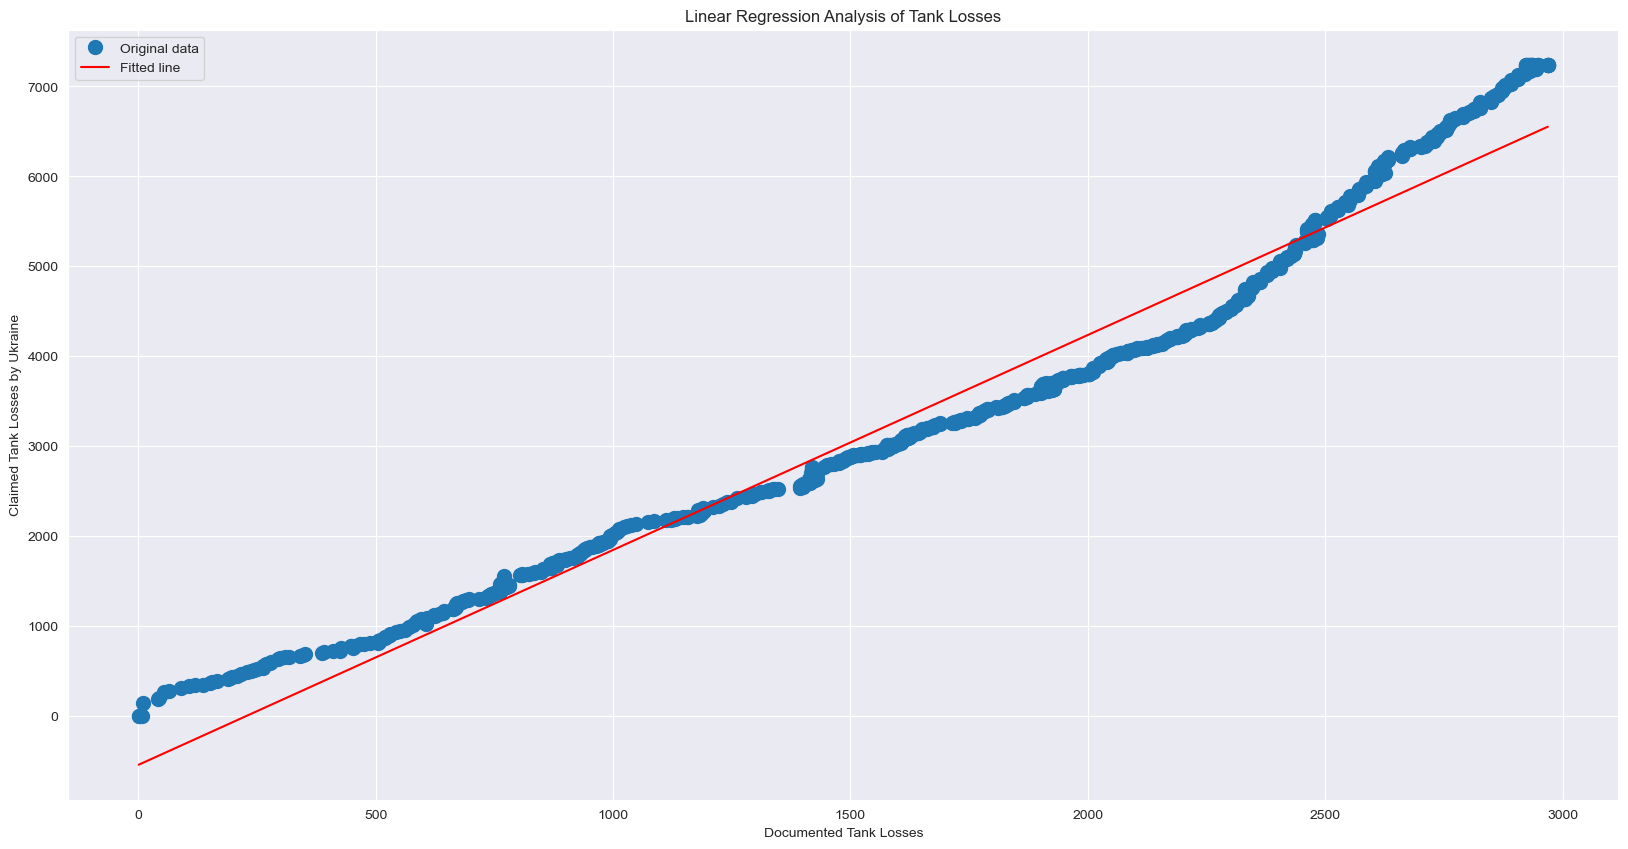

Slope: 2.390050590156359, Intercept: -543.3810072945025


In [9]:
x = documented_tanks.values.reshape(-1, 1)
y = claimed_tanks.values.reshape(-1, 1)
A = np.vstack([x.T, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.figure(figsize=(20, 10))
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.xlabel('Documented Tank Losses')
plt.ylabel('Claimed Tank Losses by Ukraine')
plt.title('Linear Regression Analysis of Tank Losses')
plt.legend()
plt.show()

print(f"Slope: {m[0]}, Intercept: {c[0]}")
